In [140]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams

In [141]:
df = pd.read_excel("Sample - Superstore.xls")
df.value_counts("State")

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada  

In [142]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [143]:
df["State"].describe()

count           9994
unique            49
top       California
freq            2001
Name: State, dtype: object

In [144]:
California = df.loc[df['State'] == 'California']
California

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [145]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit','State' ]
California.drop(cols, axis=1, inplace=True)
California


,Order Date,Sales
2,2016-06-12,14.620
5,2014-06-09,48.860
6,2014-06-09,7.280
7,2014-06-09,907.152
8,2014-06-09,18.504
...,...,...
9986,2016-09-29,36.240
9990,2017-02-26,91.960
9991,2017-02-26,258.576
9992,2017-02-26,29.600


In [146]:
California

,Order Date,Sales
2,2016-06-12,14.620
5,2014-06-09,48.860
6,2014-06-09,7.280
7,2014-06-09,907.152
8,2014-06-09,18.504
...,...,...
9986,2016-09-29,36.240
9990,2017-02-26,91.960
9991,2017-02-26,258.576
9992,2017-02-26,29.600


Agrupamos las fechas

y se resetea el index 

In [148]:
California = California.groupby('Order Date')['Sales'].sum().reset_index()
California=California.set_index('Order Date')
California.index

DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-01-31', '2014-02-02', '2014-02-04', '2014-02-12',
               '2014-02-20', '2014-02-22',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=659, freq=None)

In [151]:
y = California['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     491.037000
2014-02-01      61.740400
2014-03-01     723.909600
2014-04-01     544.345400
2014-05-01     745.002500
2014-06-01     875.864800
2014-07-01    1352.637583
2014-08-01     466.347833
2014-09-01     309.773133
2014-10-01     305.478800
2014-11-01     622.275568
2014-12-01     949.966132
2015-01-01    1177.990800
2015-02-01     239.742800
2015-03-01     585.280400
2015-04-01     705.796000
2015-05-01    1006.946938
2015-06-01     301.853800
2015-07-01     460.759111
2015-08-01     845.408300
2015-09-01     430.193150
2015-10-01     702.584929
2015-11-01     552.496294
2015-12-01     817.121211
2016-01-01     287.646400
2016-02-01     342.866000
2016-03-01    1761.938000
2016-04-01     449.801286
2016-05-01     314.407529
2016-06-01     848.443316
2016-07-01     614.669214
2016-08-01     797.750000
2016-09-01     897.443306
2016-10-01     511.658714
2016-11-01     941.920421
2016-12-01     940.732667
2017-01-01     368.816571
2017-02-01     624.080273
2

en este codigo pasado guardamos el valor de las ventas en Y 

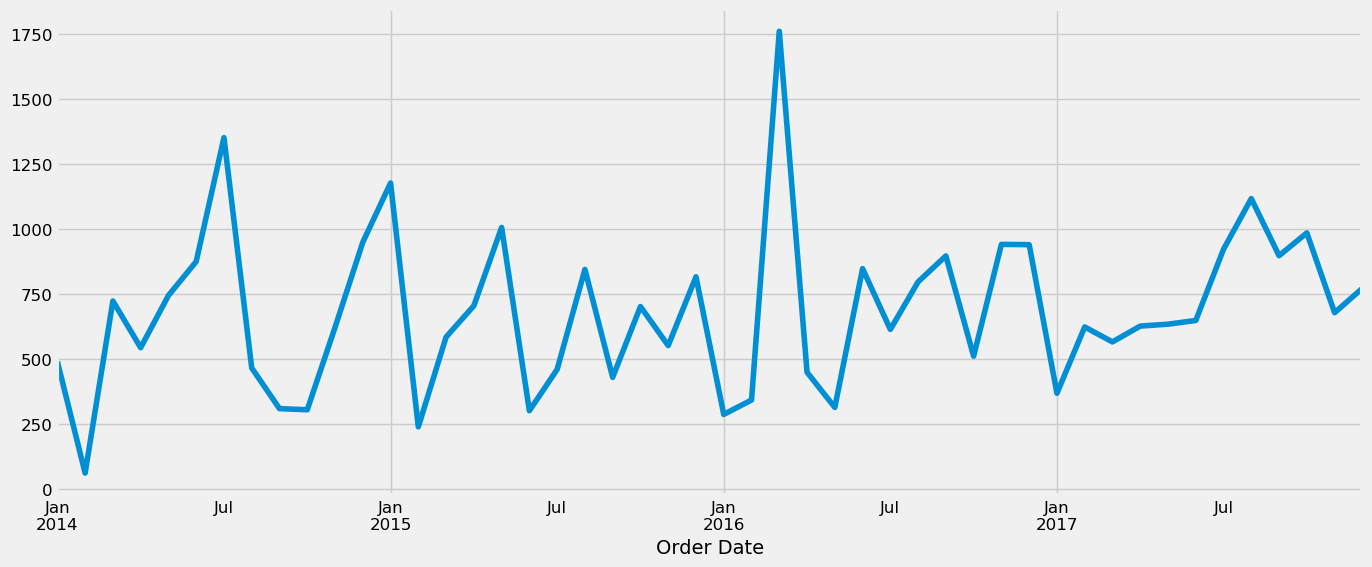

In [152]:
y.plot(figsize=(15, 6))
plt.show()

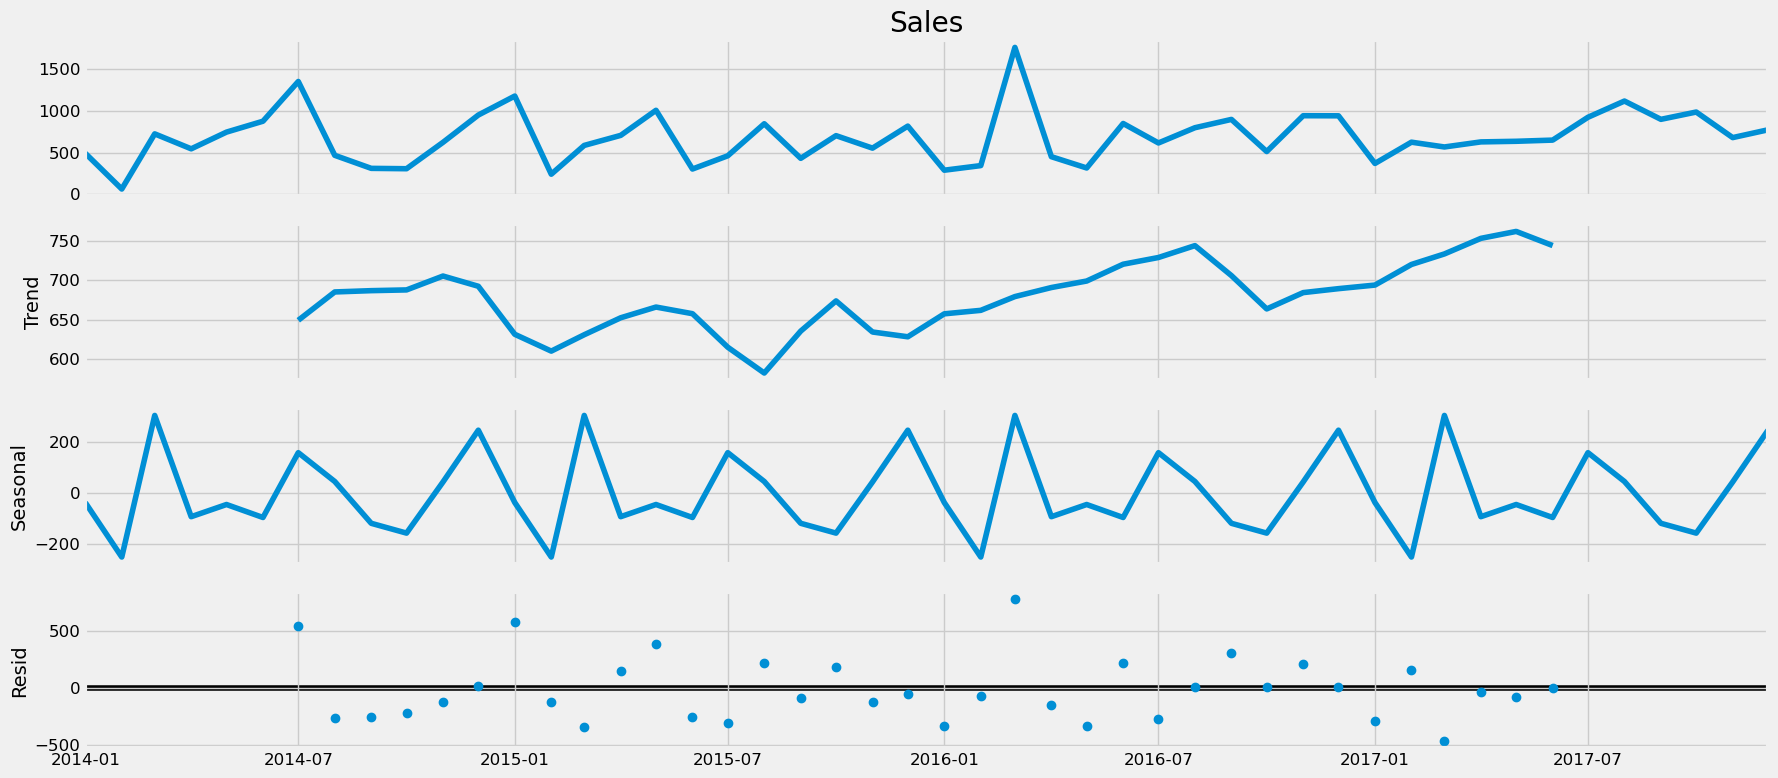

In [153]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [154]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [155]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:758.3519185373787
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1175.821691987527
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:529.9926772297314
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:341.87827369250914
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:545.6480066793605
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1387.3415183870543
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:357.20899705784245
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:343.84152353039053
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:717.5144984941082
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2394.6528528811114
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:515.6906232786046
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:329.40386617257064
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:547.5848245710416
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2369.351806573679
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:359.1916119314501
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:330.61959039510833
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:694.8423247575208
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1284.9865970283806
AR

In [171]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   4580.787     -0.000      1.000   -8979.177    8977.177
ma.S.L12      -1.0000   4580.871     -0.000      1.000   -8979.343    8977.343
sigma2      9.811e+04      0.019   5.13e+06      0.000    9.81e+04    9.81e+04


Se selecciono el valor mas bajo , donde seria 306

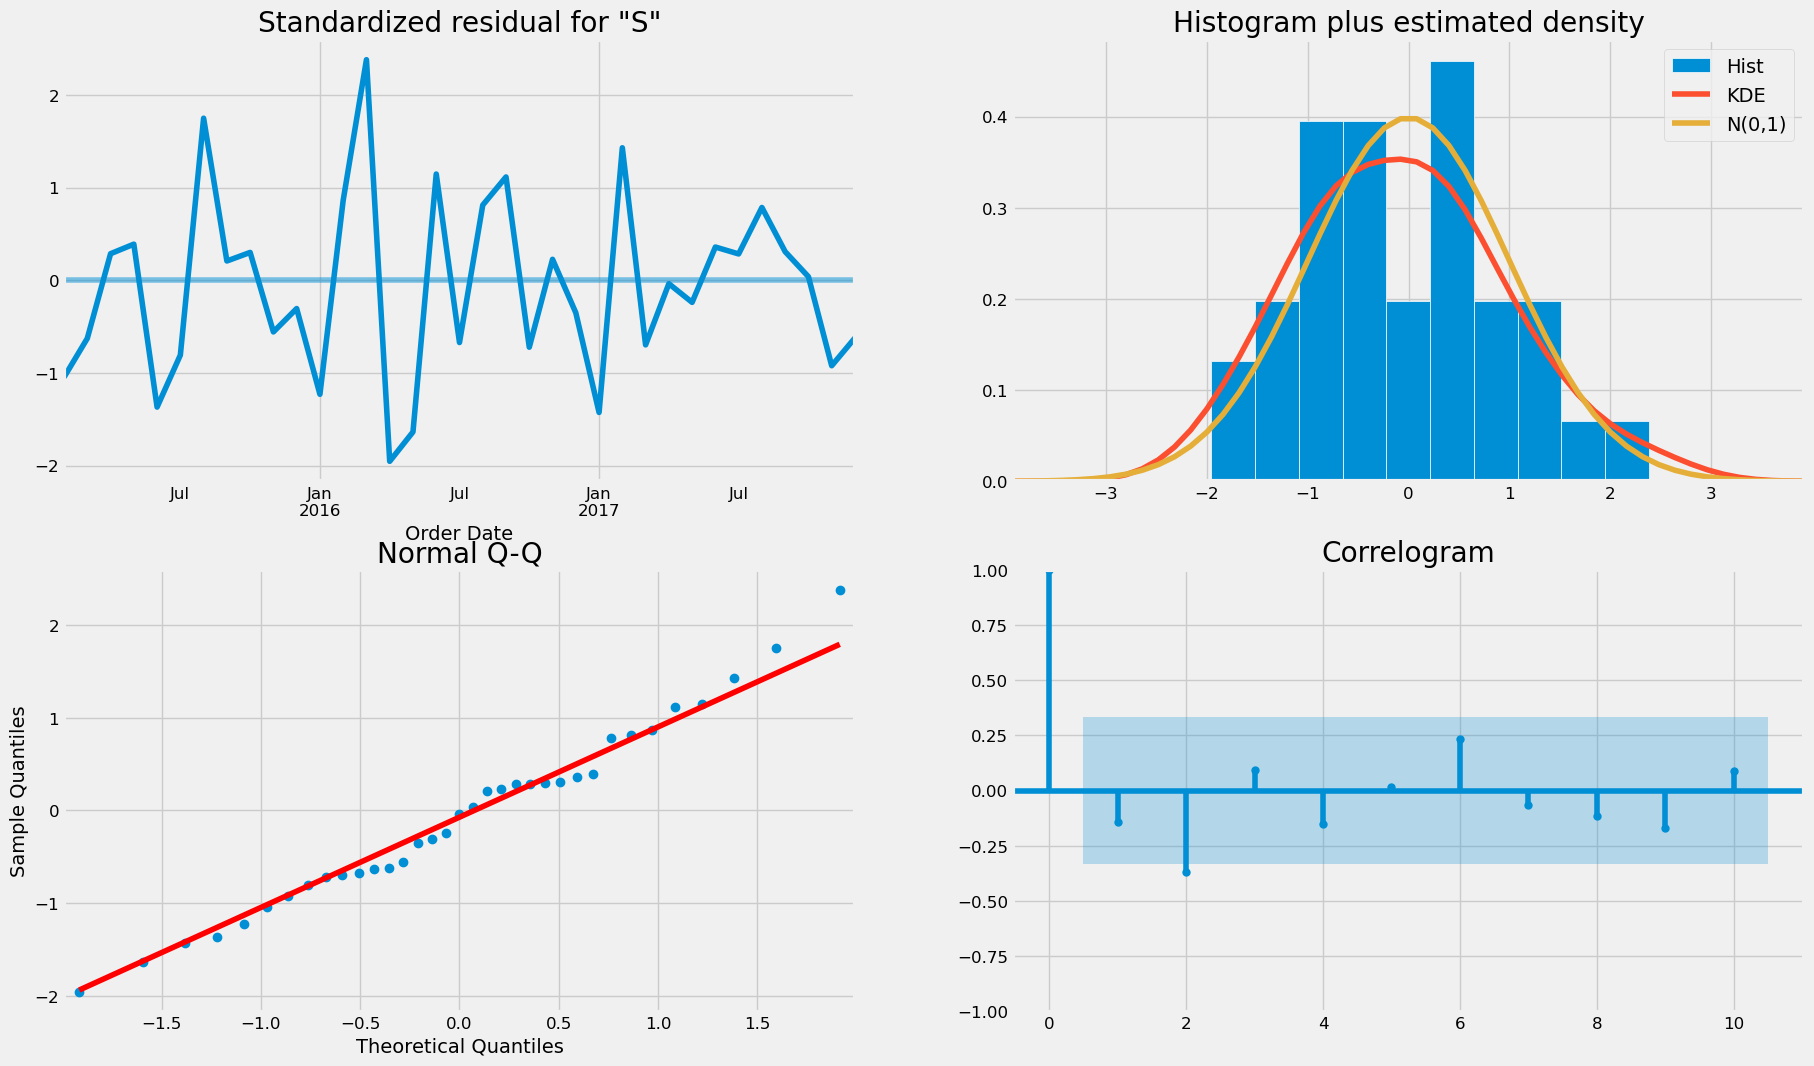

In [157]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

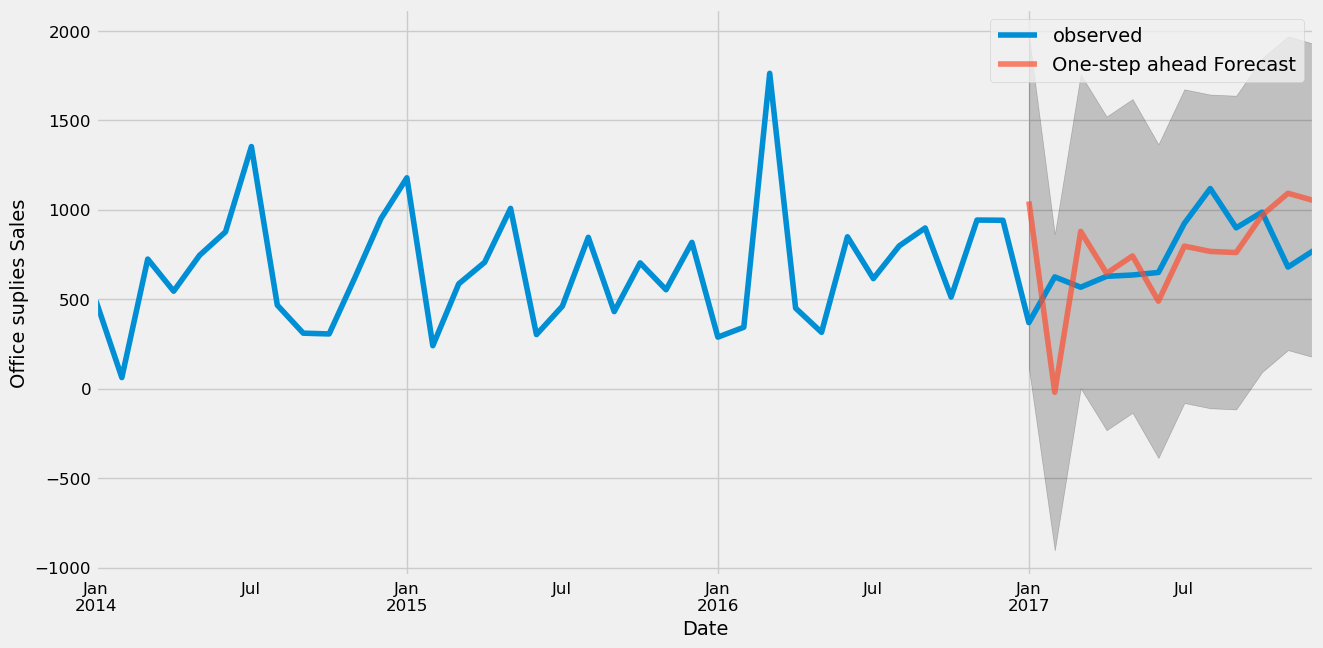

In [158]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office suplies Sales')
plt.legend()
plt.show()

In [159]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 117933.31


In [160]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 343.41


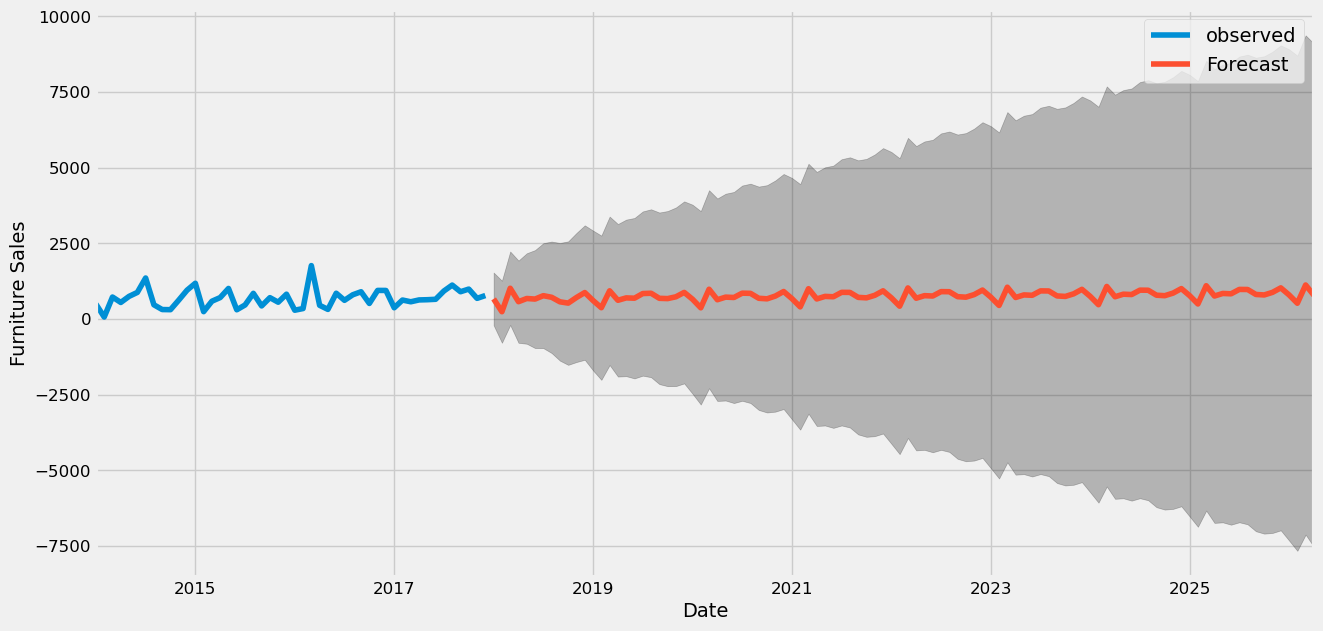

In [161]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

4-   Preguntas:
• ¿como afectan los filtros generados al resultado de los modelos?
r: con el ejemplo que se nos dio al revisar distintos tipos el programa no los predecia bien, entonces se modifico, para que se predijera mejor los resultados,y asi nos dieran los modelos.

• ¿Cuales son las categorias con menor error para hacer un pronostico ?
Office suplies Sales vendria siendo, el que es con menor error de pronostico, digamos que se acerca mas a lo esperado en Observed, llegando en cercania al punto esperado.

• Como afectan los parametros P, Q, D en los diferentes casos?
Tenemos que P es el orden autoregresivo, es el numero de pasos de tiempo anteriores que se utilizarán como predictores,la D seria diferenciacion, Es el número de diferencias no estacionales necesarias para hacer que la serie temporal sea estacionaria, Q Es el tamaño de la ventana de media móvil que se utilizará en la predicción,aca afecta a los parametros, y explora los datos, se genera el  proceso de modelado de series temporales utilizando ARIMA.


